<a href="https://colab.research.google.com/github/Ziqi-Li/GIS5122/blob/main/assignments/GIS5122_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
Due date/time: Feb 23 Fri 23:59pm

**Instruction**: Make a copy of this notebook and read through the questions and instructions. Write down code/text to perform the analysis.

**Submission**: After you finish working on this notebook, click File->Download->Download .ipynb

Please submit a notebook named A2_your_name.ipynb on Canvas.

# Data and instructions

In this assignment, we will be performing Point Pattern Analysis on crime (offenses) location data in Tempe, Arizona. I was about to find data available for FL but FL does not publish address level crime data.

As a first step. the dataset needs to be downloaded from [Here](https://data.tempe.gov/datasets/tempegov::general-offenses-open-data/explore?location=33.380547%2C-111.897684%2C12.33). You can download in either geojson or shapefile format.

Upload to Google Colab in your favorite way and read it in using `geopandas`.

The data has a year column `OccurrenceYear`. Please use `geopandas` to subset your data JUST for a particular year (e.g., 2018). For some years, there might be spatial outliers that are apparently outside of the main cluster and you need to remove them. For some other years, there are no outliers.

All the subsequent analysis are based on this single-year crime data.


First you need to install the two packages that are not available in Google Colab by running the below code.

In [ ]:
pip install -q contextily

**Note:** If you work with your own local python env and have higher version of `numpy or pointpats`. Please see this [example](https://github.com/Ziqi-Li/GIS5122/blob/main/notebooks/W5%20Point%20Pattern%20Analysis%20Cholera%20(for%20point%20pats%20v2.4.0%20and%20later%20numpy).ipynb).

If you work on Colab, please refer to this [example](https://github.com/Ziqi-Li/GIS5122/blob/main/notebooks/W5%20Point_Pattern_Analysis_Cholera%20(Colab).ipynb), and install the `pointpats` as follows:

In [1]:
pip install -q https://github.com/Ziqi-Li/pointpats/archive/v2.3.zip

Note: you may need to restart the kernel to use updated packages.


Then import all the packages needed to run the analysis

In [2]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess


## Question 1 (50%)

**Part 1:** Use Kernel Density Estimation to visualize the density distribution of crime incidents in the city of Tempe (AZ).
Please choose proper **bandwidth** and color parameters. Add a basemap image underneath using `contextily`. (30%)

**Part 2**: Write 2-3 sentences describing the pattern you see and indidating where are the places that are having the highest crime density (you may further refer to google maps for additional context of the area) (20%)

In [3]:
crime= gpd.read_file("C:/Users/jacob/OneDrive - Florida State University/SPRING 24/Applied Spatial Statistics/Assignments/Assigment data/General_Offenses_(Open_Data)/General_Offense.shp")

In [4]:
crime.head()

,OBJECTID,PrimaryKey,Occurrence,Occurren_1,Occurren_2,Occurren_3,Occurren_4,Occurren_5,Occurren_6,Obfuscated,...,Longitude,RucrComp,CharacterA,ReportDist,ReportBeat,PostalCode,CensusTrac,ParkName,Neighborho,geometry
0,1,TE201392961,2013-07-28,2013.0,7.0,2.0,31,28,Sunday,APACHE BLVD / S RURAL RD,...,-111.926285,C,Rio Salado/DT/ASU/NW Neighborhoods,N,14,85281,04013319101,None,None,POINT (-111.92630 33.41478)
1,2,TE201393098,2013-07-28,2013.0,7.0,12.0,31,28,Sunday,MILL AVE / W ALAMEDA DR,...,-111.939702,C,Alameda,S,19,85282,04013319600,None,None,POINT (-111.93971 33.40012)
2,3,TE201393163,2013-07-28,2013.0,7.0,17.0,31,28,Sunday,52ND ST / W 4TH ST,...,-111.969634,C,Diablo/Double Butte,N,12,85281,04013319710,None,None,POINT (-111.96965 33.42644)
3,4,TE201390960,2012-01-01,2012.0,1.0,8.0,1,1,Sunday,5XX E RIVIERA DR,...,-111.930866,C,Alameda,S,19,85282,04013319802,None,Tempe Gardens,POINT (-111.93088 33.38635)
4,5,TE201393242,2013-07-28,2013.0,7.0,22.0,31,28,Sunday,BASELINE RD / S MCCLINTOCK DR,...,-111.909257,C,Kiwanis/The Lakes,S,22,85282,04013319401,None,None,POINT (-111.90927 33.37844)


In [5]:
crime.shape

(307077, 27)

<Axes: >

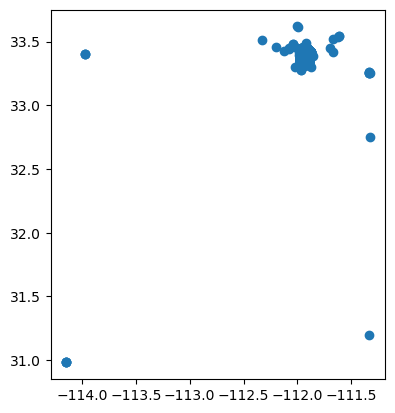

In [6]:
crime.plot()

#**Crime data for 2018**

In [7]:
crime_2018=crime[crime['Occurren_1'] == 2018]

In [10]:
crime_2018.shape

(28232, 27)

<Axes: >

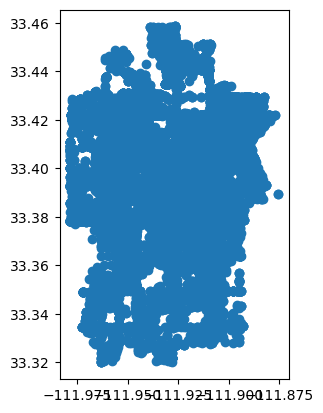

In [11]:
crime_2018.plot()

#Random Sample of 20% of the 2018 crime data in Tempe, Arizona

In [12]:
sampled_data = crime_2018.sample(frac=0.2, random_state=42)

In [13]:
sampled_data.shape

(5646, 27)

In [14]:
sampled_data.head()

,OBJECTID,PrimaryKey,Occurrence,Occurren_1,Occurren_2,Occurren_3,Occurren_4,Occurren_5,Occurren_6,Obfuscated,...,Longitude,RucrComp,CharacterA,ReportDist,ReportBeat,PostalCode,CensusTrac,ParkName,Neighborho,geometry
163197,163198,TE2018125400,2018-10-17,2018.0,10.0,23.0,42,17,Wednesday,1XXX E APACHE BLVD,...,-111.904619,C,Apache,N,15,85281,04013319201,None,Alegre Community,POINT (-111.90463 33.41502)
164293,164294,TE2018129853,2018-10-27,2018.0,10.0,18.0,43,27,Saturday,5XXX S ARIZONA MILLS CIR,...,-111.963070,C,Mills/Emerald,S,21,85282,04013319707,None,None,POINT (-111.96308 33.38489)
167354,167355,TE2018146685,2018-12-05,2018.0,12.0,11.0,49,5,Wednesday,BROADWAY RD / S PRICE RD NB,...,-111.890333,C,Alameda,N,15,85281,04013319300,None,None,POINT (-111.89034 33.40750)
164049,164050,TE2018128898,2018-10-25,2018.0,10.0,20.0,43,25,Thursday,3XXX S RURAL RD,...,-111.926345,C,Alameda,S,20,85282,04013319401,None,None,POINT (-111.92636 33.39157)
166698,166699,TE2018142956,2018-11-24,2018.0,11.0,21.0,47,24,Saturday,1XXX S DORSEY LN,...,-111.917729,C,Rio Salado/DT/ASU/NW Neighborhoods,N,14,85281,04013319101,None,None,POINT (-111.91774 33.41803)


<Axes: >

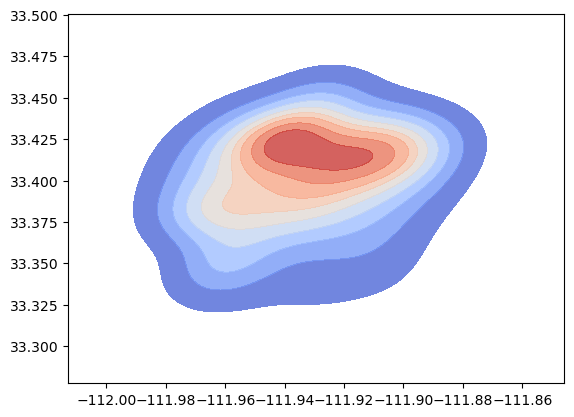

In [15]:
sns.kdeplot(data=sampled_data,
            x=sampled_data.geometry.x,
            y=sampled_data.geometry.y,
            bw_method=0.5,
            fill=True,
            cmap="coolwarm",
            alpha=0.8)

##*Overlaying the KDE on the crime locations points*

<Axes: >

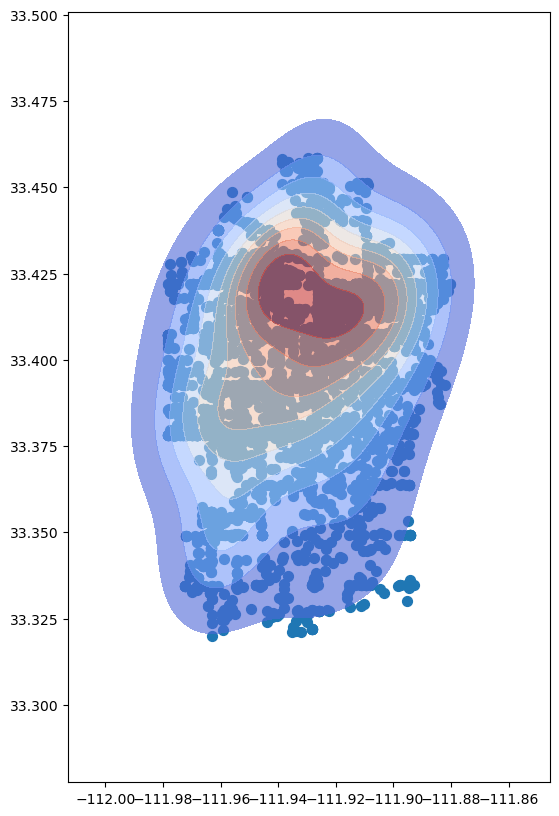

In [16]:
f, ax = plt.subplots(figsize=(10,10))
sampled_data.plot(ax=ax, markersize = 50)



sns.kdeplot(ax=ax, data=sampled_data,
            x=sampled_data.geometry.x,
            y=sampled_data.geometry.y,
            bw_method=0.5,
            fill=True,
            cmap="coolwarm",
            alpha=0.6)

##**Adding a basemap to the KDE**

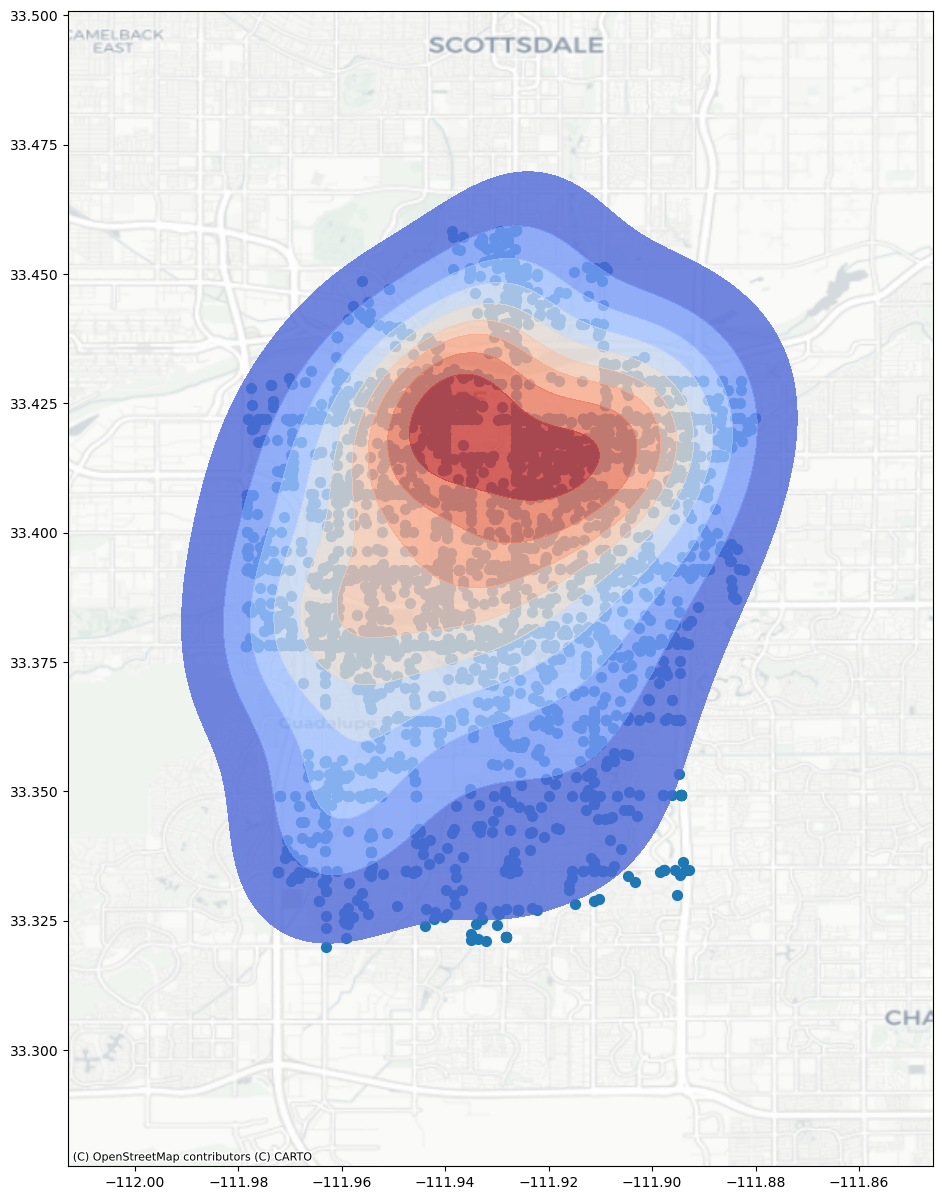

In [17]:
f, ax = plt.subplots(figsize=(15,15))

sampled_data.plot(ax=ax, markersize = 50, figsize=(9,9))

sns.kdeplot(ax=ax,data=sampled_data, x=sampled_data.geometry.x, y=sampled_data.geometry.y, bw_method=0.5, fill=True,
            cmap="coolwarm",alpha=0.8)


cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs=sampled_data.crs)

#**Part 2 of Question 1**

As shown on the KDE map above, there are more cluster of the crime incidence closer to the northern part of Tempe. The crime scenes are clustered around the Arizona State Unversity (ASU) but reduces as the distance from the Unversity increases. The sample data revealed that more crime incidences were recorded around ASU in 2018.

## Question 2 (50%)
**Part 1.** Use the `pointpats` library to calculate and visualize the G function curve and K function curve. (20%)

**Part 2.** Write 2-3 sentences to describe and interpret both plots, and indicate whether the pattern is statistically clustered, random or regular. (20%)

**Part 3.** Use 1-2 sentences to briefly describe the methodological difference between the G function and K function. (10%)

In [18]:
from pointpats import distance_statistics as stats
from pointpats import PointPattern, PoissonPointProcess

In [19]:
x = sampled_data.geometry.x.values
y = sampled_data.geometry.y.values

points = np.array(list(zip(x,y)))

In [20]:
pp = PointPattern(points)

C:\Users\jacob\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1394: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
C:\Users\jacob\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:1123: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


In [21]:
pp

In [23]:
CSRs = PoissonPointProcess(pp.window, pp.n, 100, asPP=True)

C:\Users\jacob\anaconda3\Lib\site-packages\libpysal\cg\shapes.py:100: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)


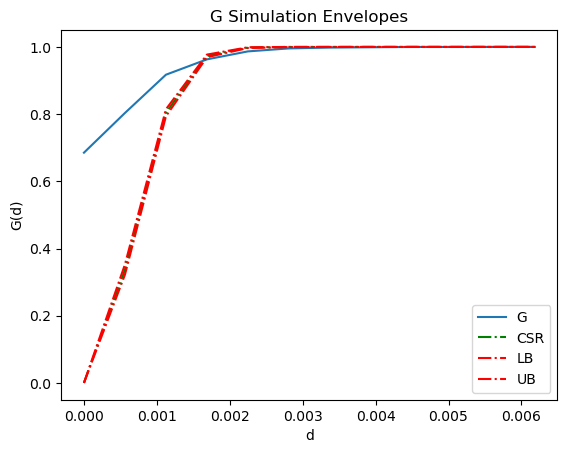

In [26]:
genv = stats.Genv(pp, realizations=CSRs,pct=0.05)

genv.plot()

The results in the figure above show that the G curve is above the confidence envelope (red curves), indicating a statistically clustered pattern was observed (at the 0.05 level) on the crime map in Tempe for recorded crime incidences in 2018.

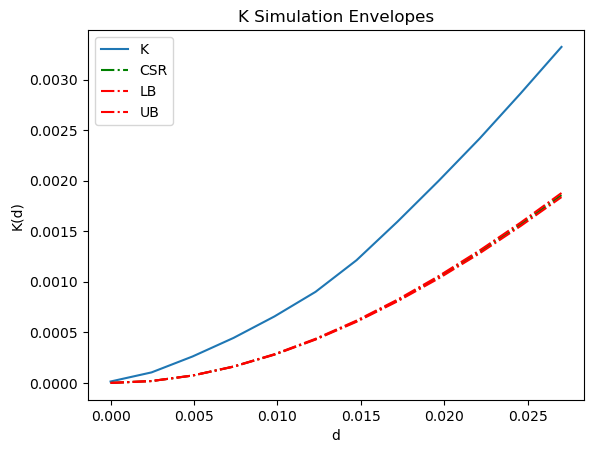

In [27]:
kenv = stats.Kenv(pp, realizations=CSRs,pct=0.05) # call Fenv for F function
kenv.plot()

The results in the figure above show that the K curve is above the confidence envelope (red curves), indicating a statistically clustered pattern was observed (at the 0.05 level) on the crime map in Tempe for recorded crime incidences in 2018.

#**Part 3 of Question 2**

The G function focuses on the distribution of distances from each point to its nearest neighbor. However, the K function assesses the cumulative number of points within a given distance of each point, offering a macroscopic perspective on spatial clustering.